---

## 3-2. 영교차 이론 (Zero crossing)

Marr-Hilderth 에지 검출의 과정으로, 2차 미분을 통해 영교차를 찾아서, 에지를 검출한다.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/Marr-Hildreth.PNG" width="450" height="600">




---
### - 가우시안과 다중 스케일 효과

- 에지 검출시 gaussian 필터를 사용하는 이유 1
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/derivate_blur.PNG" width="450" height="600">

salt-pepper blur에서 2차 미분을 보면, 잡음의 값과 폭도 넓어짐을 볼 수 있다.

그래서, 미분 하기전에 가우시안으로 스무딩 전처리 과정이 필요하다.

---
- 에지 검출시 gaussian 필터를 사용하는 이유 2
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/multiscale.PNG" width="450" height="600">

가우시안 표준편차(σ) 를 조절해 다중-스케일(multi-scale)(???) 효과를 얻을 수 있다.

즉, σ를 크게하면 영상 디테일을 없애고 큰 물체의 에지만 검출, 작게하면 디테일에 해당하는 에지까지 검출.


---
### - LOG 필터 (Laplacian of Gaussian)

영상의 2차 미분을 라플라시안 연산을 통해 구한다. (sobel 두번을 하면 안되나? dx , dy)

라플라시안은 이차편도함수를 더한것이다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/laplacian.PNG" width="450" height="600">

영상 f를 가우시안 스무딩하고, 다시 라플라시안을 구한다면 계산 효율이 떨어진다.

또한, 가우시안을 이산 필터로 근사화, 라플라시안을 이산 필터로 근사화 한다. 근사화가 두번되어 오차가 커진다.

그래서, LOG 필터를 사용한다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/logfilter.PNG" width="450" height="600">

컨볼루션과 라플라시안 연산 간 결합법칙이 성립한다.(??? 둘다 커널연산이라서?)

그래서, 가우시안 커널에 라플라시안을 연산하고, 영상과 컨볼루션 한 것이 LOG 필터이다.


이를 통해, Marr-Hilderth 에지 검출 과정을 2단계로 줄일 수 있다.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/Marr-Hildreth2.PNG" width="450" height="600">

---
### - 영교차 검출 

LOG 필터를 적용해, 영상의 2차 미분을 구했다면 영교차를 검출해야한다.

1차원 영상처럼, +에서 - 로 0 이 교차되는 화소를 찾으면 잡음과 이산 공간 근사화로 인한 오차로 성능이 떨어진다.

그래서 주변화소들을 이용한다.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/zerocrossing.PNG" width="450" height="600">

LOG 필터를 적용한 영상에서, 한 화소를 영교차 검출하기.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/zerocrossing2.PNG" width="450" height="600">

결과 영교차 화소이면, 1을 넣는다. 이진 영상이 된다.


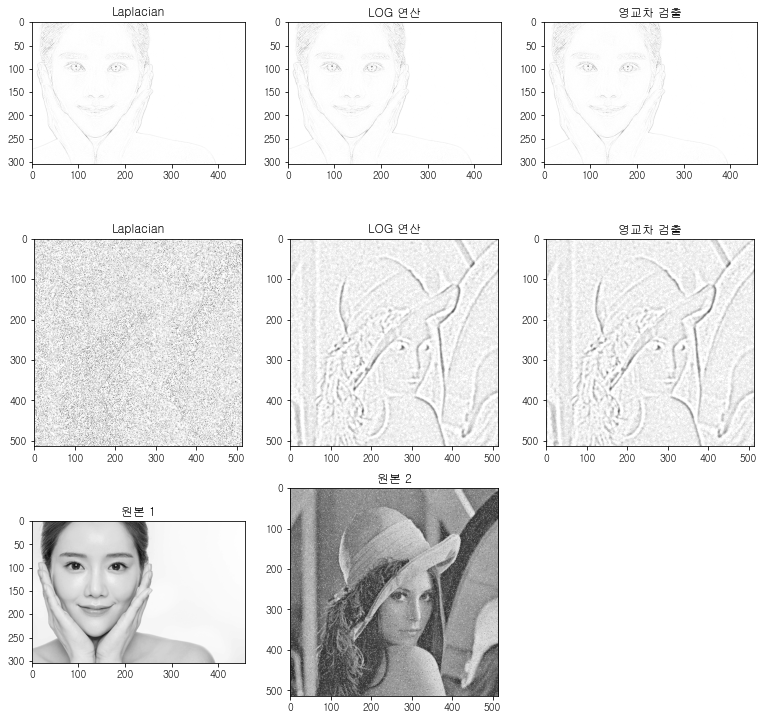

In [34]:
# EX) Marr-Hilderth 에지 검출 (LOG) 와 LAPLACIAN 커널 비교
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import cv2
import numpy as np
from matplotlib import pyplot as plt


fig =plt.figure(figsize=(13,13))

img_blur = cv2.imread("./data/saltpepper.png",0)
img = cv2.imread("./data/find_face.jpg",0) # gray scale로 읽어서, 1 채널 명암값에 필터를 적용한다.

#먼저, 라플라시안 커널을 생성하고 연산한다.
#https://marisara.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-openCV-19-%EC%97%90%EC%A7%80%EA%B2%80%EC%B6%9C-%EB%9D%BC%ED%94%8C%EB%9D%BC%EC%8B%9C%EC%95%88Laplacian-LoGLaplacian-of-Gaussian-DoGDifference-of-Gaussian?category=818751

mask1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplacian = cv2.filter2D(img, -1, mask1)

mask1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplacian_blur = cv2.filter2D(img_blur, -1, mask1)


# Marr-Hilderth 에지 검출
# https://theailearner.com/2019/05/25/laplacian-of-gaussian-log/

#1. 영상을 가우시안 스무딩 한다.
gaussian_img = cv2.GaussianBlur(img, (0, 0), 2)
gaussian_img_blur = cv2.GaussianBlur(img_blur, (0, 0), 3)


#2. 라플라시안 연산을 한다.
log1 = cv2.filter2D(img, -1, mask1)
log2 = cv2.filter2D(gaussian_img_blur, -1, mask1)
#3. 영교차 검출.
# 또는 직접 가우시안 필터 계산



plt.subplot(331)
plt.imshow(255-laplacian,'gray')# laplacian 색 반전
plt.title('Laplacian')

plt.subplot(332)
plt.imshow(255-log1,'gray')# log 색 반전
plt.title('LOG 연산')

plt.subplot(333)
plt.imshow(255-log1,'gray')# log 색 반전
plt.title('영교차 검출')

##blur

plt.subplot(334)
plt.imshow(255-laplacian_blur,'gray')# laplacian 색 반전
plt.title('Laplacian')

plt.subplot(335)
plt.imshow(255-log2,'gray')# log 색 반전
plt.title('LOG 연산')

plt.subplot(336)
plt.imshow(255-log2,'gray')# log 색 반전
plt.title('영교차 검출')


plt.subplot(337)
plt.imshow(img,'gray')# log 색 반전
plt.title('원본 1')

plt.subplot(338)
plt.imshow(img_blur,'gray')# log 색 반전
plt.title('원본 2')



plt.show()


### 3-3. 캐니 에지 (Canny Edge)
에지 검출시 3가지 조건을 만족하여 최적화 해야한다.

1. 최소 오류율 : FP와 FN 최소. 실제 에지들만 검출되야하고, 에지를 못 찾으면 안된다. 

2. 위치 정확도 : 캐니 에지와 실제 이미지 에지 사이의 거리가 최소가 되야한다.

3. 에지 두께 : 실제 에지에 해당하는 곳에는 한 두께의 에지만 생성해야한다.

---
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/canny.PNG" width="450" height="600">

---
#### 과정2. edge magnitude 맵, edge 방향 맵 계산. 
케니는 가우시안에 1차 미분을 적용한 연산자가 최적임을 수학적으로 증명하였다.

하지만, 2차원에서는 그레디언트 방향을 구해야한다. 소벨 커널을 이용해 그래디언트 방향을 구하는 것으로 근사화 할 수 있다.

그레디언트를 구하면, edge magnitude를 구할 수 있다.

그레디언트 방향을 알면, edge 방향을 구해 양자화 할 수 있다.


---
#### 과정3. 비최대 억제(non-maximum suppression)
과정 2에서 구한 edge 맵은 두께가 두꺼워, 얇게 바꾸는 비최대 억제 단계가 필요하다.

이때 억제는 에지가 아닌것으로 결정하는 것.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/nonmaximum.PNG" width="450" height="600">

중앙 화소가 자신의 이웃보다 크지않으면 억제된다. 이때 이웃화소는 에지방향에 따른 두 화소다.

예를들어, 중앙화소의 에지 방향이 1 일때, (북동) (남서)보다 에지강도가 크면 에지가 된다.

지역 최대점만 에지로 검출하므로, 두께가 얇은 에지 영상이 생성된다.


---
#### 과정4. 이력 임계값(hystersis thresholding)

과정 3이 끝나면, FP가 많아진다.

해당 화소가 에지인지 검출하려면, 이전 화소들의 상태를 보면 알 수 있다.

케니 알고리즘은 두 임계값 T_low , T_high를 사용한다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/hysteresis.jpg" width="450" height="600">

에지 추적은 T_high를 넘는 화소에서만 시작이되고, 시작화소가 정해지면 T_low 넘으면 모두 에지화소가 된다.



---
```
cv2.Canny(img, threshold1,threshold2 [, edges, apertureSize, L2gradient])

• img : 입력영상
• threshold1, threshold2 : 이력 스레시 홀딩에 사용할 최대,최소 값.
• apertureSize: 소벨 마스크에 사용할 커널 크기(???)
• L2gradient: 그레디언트 강도를 구할 방법
    - True : 유클리드 거리
    - False : 절대값 합

가우시안 시그마 조절은 안된다. 시그마=2.0 고정
```




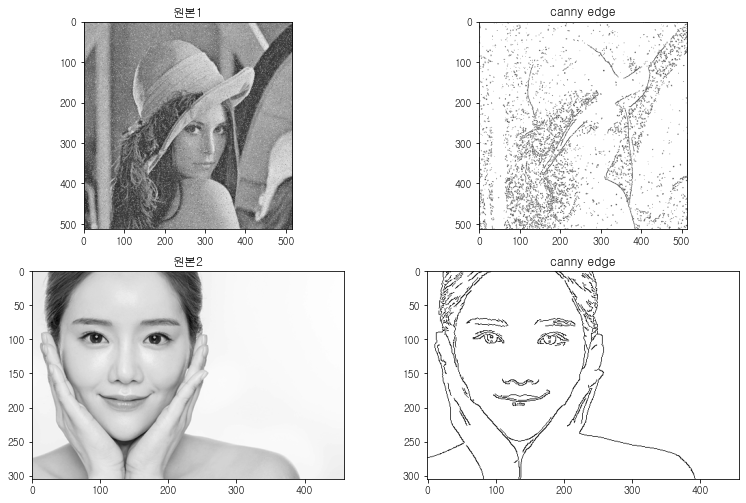

In [23]:
#ex) 케니 에지 검출.
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import cv2
import numpy as np
from matplotlib import pyplot as plt

# salt-pepper 이미지를 불러온다.
img_blur = cv2.imread('./data/saltpepper.png',0)

# 정상적인 이미지
img = cv2.imread('./data/find_face.jpg',0)


# canny 검출
img_edge = cv2.Canny(img_blur,300,400)
img_edge_normal = cv2.Canny(img,100,200)


fig =plt.figure(figsize=(13,13))

plt.subplot(321)
plt.imshow(img_blur,'gray')
plt.title('원본1')

plt.subplot(322)
plt.imshow(255-img_edge,'gray')#반전해준다.
plt.title('canny edge')

plt.subplot(323)
plt.imshow(img,'gray')
plt.title('원본2')

plt.subplot(324)
plt.imshow(255-img_edge_normal,'gray')#반전해준다.
plt.title('canny edge')

plt.show()


#정상적인 영상에서는 에지가 얇게 구해지는 것을 볼 수 있다.

## 3-4. 컬러 에지
명암 영상으로 바꾸고 검출해도 되지만, 컬러의 정보를 활용해 더 나은 품질의 에지를 검출할 수 도 있다.

#### 에지 OR 연산
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/colorEdge1.PNG" width="350" height="500">

각각의 채널에서 독립적으로 에지를 검출한 후, 그 결과 하나로 결합.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/colorEdge2.PNG" width="350" height="500">

하얀색은 셋다 같이 검출된 예. 하지만, 엣지 위치가 어긋나기도 한다.

만약 OR대신 평균을 낸다면, 셋다 같은 에지방향이면 에지강도를 강하게 해줘야 이치에 맞다.


#### Di Zenzo 방법.
그래서 Di zenzo는 새로 그레디언트를 정의했다.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/dizenzo.PNG" width="350" height="500">



<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/dizenzo2.PNG" width="350" height="500">
좌측이 dizenzo 방법, 우측이 rgb 평균 일때

에지맵 강도가 dizenzo가 더 진한것을 볼 수 있다.
